In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mtree import MTree
from plotting import set_plot_datapath, plot_minutia_zoom, plot_minutia_compare, imshow_sample, mark_minutia


mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{{amsmath}}'
datapath = '../data/fvc2002/'
set_plot_datapath(datapath)

In [2]:
def minutiaDict2str(m):
    return f'A{m['finger']}_{m['sample']}_p{m['minutia_no']}'

def minutiaDict2FSN(m):
    # FSN: Finger, Sample, MinutiaNo
    return m['finger'], m['sample'], m['minutia_no']

def minutiaDict2FS(m):
    # FS: Finger, Sample
    return m['finger'], m['sample']

In [3]:
VLFL = [] # VLFL (Very Large Features List)
for i in range(1,11):
    for j in range(1,9):
        if (i, j) == (10, 4):
            # Dado problemático
            continue
        filename = datapath + f'features/A{i}_{j}.npy'
        features = np.load(filename)
        for k in range(features.shape[0]):
            VLFL.append({'finger': i, 'sample': j, 'minutia_no': k, 'vec': features[k, :]})

In [4]:
def Dcos(x, y):
    eps = 1e-5 # Ensure positivity
    return 1 + eps - np.dot(x['vec'], y['vec'])

def L2(x, y):
    return np.linalg.norm(x['vec'] - y['vec'])

tree = MTree(L2, max_node_size=10)

In [5]:
tree.add_all(VLFL)

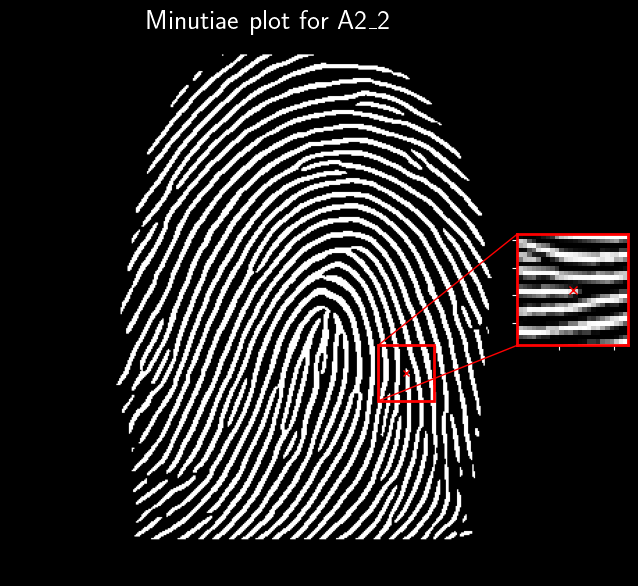

In [6]:
data = VLFL[420]
plot_minutia_zoom(*minutiaDict2FSN(data))

In [7]:
k = 8
results = list(tree.search(data, k))

# Pq retorna None??
results = [r for r in results if r is not None]

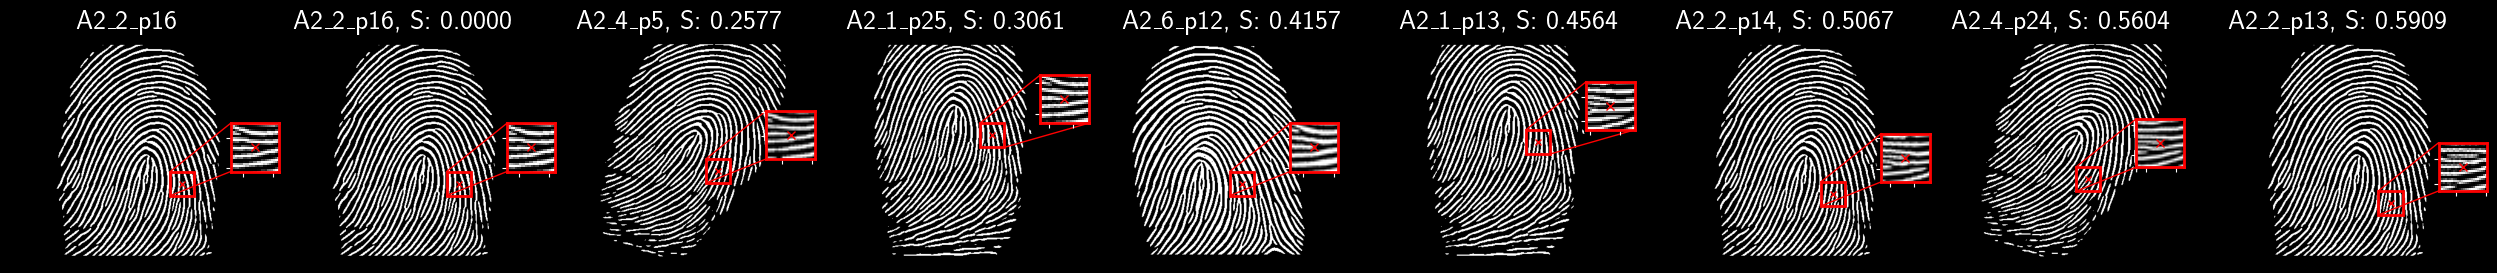

In [8]:
k = len(results)
fig, axs = plt.subplots(nrows=1, ncols=k+1, figsize=(25, 5))

imshow_sample(axs.flat[0], *minutiaDict2FS(data))
mark_minutia(axs.flat[0], *minutiaDict2FSN(data), zoom=True)
axs.flat[0].set_title(minutiaDict2str(data), fontsize=20)
axs.flat[0].axis('off')

for i in range(k):
    result = results[i]
    imshow_sample(axs.flat[i+1], *minutiaDict2FS(result))
    mark_minutia(axs.flat[i+1], *minutiaDict2FSN(result), zoom=True)
    axs.flat[i+1].set_title(minutiaDict2str(result) + f', S: {L2(data, result):.4f}', fontsize=20)
    axs.flat[i+1].axis('off')


plt.tight_layout()

## Next Steps

In [9]:
# Selecionar todas as minúcias de um mesmo dedo
finger = 4
sample = 2

featureList = [minutiaD for minutiaD in VLFL if minutiaD['finger'] == finger and minutiaD['sample'] == sample]

In [10]:
# Para cada minúcia, encontrar os k mais próximos
results = []
for feature in featureList:
    k = 9
    results.append(list(tree.search(feature, k)))

In [11]:
# Agrupar os resultados
minutias = [11, 22, 33]
for minutia_no in minutias:
    matchDict = dict()
    for r in results[minutia_no][1:]:
        if r:
            key = f"A{r['finger']}_{r['sample']}"
            matchDict[key] = matchDict.get(key, 0) + 1
    print(matchDict)

{'A4_3': 1, 'A4_7': 1, 'A4_8': 2, 'A4_5': 2, 'A4_1': 1}
{'A4_2': 3, 'A4_7': 2, 'A4_3': 1, 'A4_1': 1, 'A4_8': 1}
{'A4_2': 2, 'A4_3': 2, 'A4_1': 1, 'A4_7': 1, 'A4_6': 1, 'A4_8': 1}
